# **Movie Recommendation System**

### **Objective**

The objective of a Movie Recommendation System is to provide personalized and relevant movie suggestions to users based on their preferences and interests. The system analyzes user data, such as past movie ratings, viewing history, and demographic information, to generate recommendations that align with their taste.

### **Data Source**

YBI foundation dataset repository on Github

### **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Data**

In [ ]:
movie = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Movies%20Recommendation.csv')

### Describe **Data**

In [ ]:
movie.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
movie.shape

(4760, 21)

### **Data Visualization**

In [ ]:
movie.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


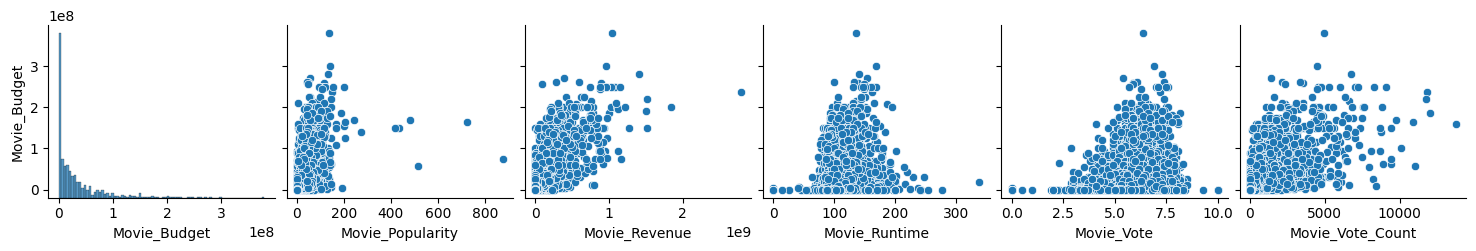

In [ ]:
sns.pairplot(movie, x_vars= ['Movie_Budget', 'Movie_Popularity','Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count'], y_vars=['Movie_Budget'])

### **Data Preprocessing**

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [ ]:
movie.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

### **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
movie_features = movie[['Movie_Genre', 'Movie_Keywords', 'Movie_Tagline','Movie_Cast', 'Movie_Director']].fillna('')

In [ ]:
movie_features

,Movie_Genre,Movie_Keywords,Movie_Tagline,Movie_Cast,Movie_Director
0,Crime Comedy,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders
1,Adventure Action Science Fiction,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas
2,Animation Family,father son relationship harbor underwater fish...,"There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,Andrew Stanton
3,Comedy Drama Romance,vietnam veteran hippie mentally disabled runni...,"The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,Robert Zemeckis
4,Drama,male nudity female nudity adultery midlife cri...,Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,Sam Mendes
...,...,...,...,...,...
4755,Horror,,The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,Pece Dingo
4756,Comedy Family Drama,,It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,Frank Lotito
4757,Thriller Drama,christian film sex trafficking,She never knew it could happen to her...,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,Jaco Booyens
4758,Family,,,,


In [ ]:
x = movie_features['Movie_Genre']+' '+ movie_features['Movie_Keywords']+' '+ movie_features['Movie_Tagline']+' '+ movie_features['Movie_Cast']+' '+ movie_features['Movie_Director']

In [ ]:
x

0       Crime Comedy hotel new year's eve witch bet ho...
1       Adventure Action Science Fiction android galax...
2       Animation Family father son relationship harbo...
3       Comedy Drama Romance vietnam veteran hippie me...
4       Drama male nudity female nudity adultery midli...
                              ...                        
4755    Horror  The hot spot where Satan's waitin'. Li...
4756    Comedy Family Drama  It’s better to stand out ...
4757    Thriller Drama christian film sex trafficking ...
4758                                           Family    
4759    Documentary music actors legendary perfomer cl...
Length: 4760, dtype: object

In [ ]:
x.shape

(4760,)

### **Train Test Split** / get feature text conversion to text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
x = tfidf.fit_transform(x)

In [ ]:
x.shape

(4760, 17258)

### **Modeling**

cosine similarities


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_score = cosine_similarity(x)

In [ ]:
similarity_score

array([[1.        , 0.01351235, 0.03570468, ..., 0.        , 0.        ,
        0.        ],
       [0.01351235, 1.        , 0.00806674, ..., 0.        , 0.        ,
        0.        ],
       [0.03570468, 0.00806674, 1.        , ..., 0.        , 0.08014876,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08014876, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
similarity_score.shape

(4760, 4760)

### **Model Evaluation**

get movie name as input from user and validate for closest spelling

In [ ]:
favorite_movie_name = input(' enter your favorite movie name : ')

 enter your favorite movie name : ironman


In [ ]:
all_movies_title_list = movie['Movie_Title'].tolist()

In [ ]:
import difflib

In [ ]:
movie_recommendation = difflib.get_close_matches(favorite_movie_name,all_movies_title_list)
print(movie_recommendation)

['Birdman', 'Iron Man', 'Hitman']


In [ ]:
close_match = movie_recommendation[0]
print(close_match)

Birdman


In [ ]:
index_of_close_match_movie = movie[movie.Movie_Title == close_match]['Movie_ID'].values[0]
print(index_of_close_match_movie)

4266


In [ ]:
Recommendation_Score = list(enumerate(similarity_score[index_of_close_match_movie]))
print(Recommendation_Score)

[(0, 0.016046100262967045), (1, 0.017899738451880337), (2, 0.0), (3, 0.002590844128884647), (4, 0.00310956223179305), (5, 0.0029558958836820855), (6, 0.031745542739484524), (7, 0.016513130894756076), (8, 0.003200627240488416), (9, 0.0), (10, 0.0), (11, 0.0030518677664625464), (12, 0.013254956737385902), (13, 0.0), (14, 0.0), (15, 0.029933047085007623), (16, 0.002456393716889702), (17, 0.010054599587232378), (18, 0.002825964515456172), (19, 0.03438559974500846), (20, 0.01298292529740127), (21, 0.0031516153884848007), (22, 0.019898185120266542), (23, 0.025284077720264996), (24, 0.02665291663353726), (25, 0.03577885344213664), (26, 0.002883608760959967), (27, 0.020817100565707205), (28, 0.02034684369243514), (29, 0.0028065104058457497), (30, 0.09051104953848507), (31, 0.03276391348295596), (32, 0.0025844538807149394), (33, 0.002604508669284948), (34, 0.0030666889276055745), (35, 0.008911243022176423), (36, 0.0), (37, 0.017456877332101068), (38, 0.02185364805361024), (39, 0.020122320916732

get all movies sort based on recommendation score wrt favorite

In [ ]:
sorted_similar_movies = sorted(Recommendation_Score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(4266, 1.0), (4087, 0.3106692471066014), (751, 0.12895706921098332), (2560, 0.1221765778602264), (3323, 0.11661929263591958), (2910, 0.09210316907532475), (3203, 0.09057292893533381), (30, 0.09051104953848507), (3998, 0.08584951319584594), (769, 0.08278552852612406), (3711, 0.08133874967688678), (3949, 0.08088163930941877), (1166, 0.07866194490104228), (380, 0.07781150628377263), (3262, 0.07667891691540495), (427, 0.07355591528395924), (826, 0.07319116191212093), (2917, 0.07306944222804346), (2795, 0.07231351406080323), (3192, 0.0723058386919152), (2634, 0.07109950310921223), (3123, 0.06970567537821094), (3480, 0.06878592804975327), (60, 0.06853343944475265), (249, 0.06497975501730828), (554, 0.0645009319443497), (2443, 0.06442376920794939), (545, 0.06431148124264302), (2477, 0.06407216187171164), (883, 0.06283025997481548), (2185, 0.06274507749711133), (3613, 0.06159223906137164), (4540, 0.061007316553387106), (1782, 0.06058630177132649), (2225, 0.06051863830773243), (2814, 0.0602311

### **Prediction**

In [ ]:
movie_name = input(' enter your favorite movie name : ')
list_all_movies_title_list = movie['Movie_Title'].tolist()
find_close_match = difflib.get_close_matches(movie_name,list_all_movies_title_list)
close_match = find_close_match[0]
index_of_match_movie = movie[movie.Movie_Title == close_match]['Movie_ID'].values[0]
Recommendation_Score = list(enumerate(similarity_score[index_of_match_movie]))
sorted_similar_movies = sorted(Recommendation_Score, key = lambda x:x[1], reverse = True)

#print the name of simiar movies based on the index
print('top 10 movies suggested for you : \n ')
i = 1
for Movie in sorted_similar_movies:
  index = Movie[0]
  title_from_index = movie[movie.index==index]['Movie_Title'].values[0]
  if (i<11):
    print(i,'.', title_from_index)
    i+=1

 enter your favorite movie name : iron man
top 10 movies suggested for you : 
 
1 . The Forbidden Kingdom
2 . The Mummy: Tomb of the Dragon Emperor
3 . Resident Evil: Retribution
4 . The Warlords
5 . Lethal Weapon 4
6 . The One
7 . War
8 . Unleashed
9 . Snow Flower and the Secret Fan
10 . Kiss of the Dragon


### **Explaination**

A Movie Recommendation System is a software algorithm or system that suggests movies to users based on their preferences and interests. It analyzes user data and movie attributes to generate personalized recommendations.